In [1]:
# Import Dependencies
from sklearn import tree
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in both datasets
red = pd.read_csv('winequality-red.csv', delimiter=",")
white = pd.read_csv('winequality-white.csv', delimiter=",")

In [3]:
# Add column in each dataset for wine color values
white['color'] = 0
red['color'] = 1
# Combine datasets
allwines = red.append(white, ignore_index=True)
allwines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


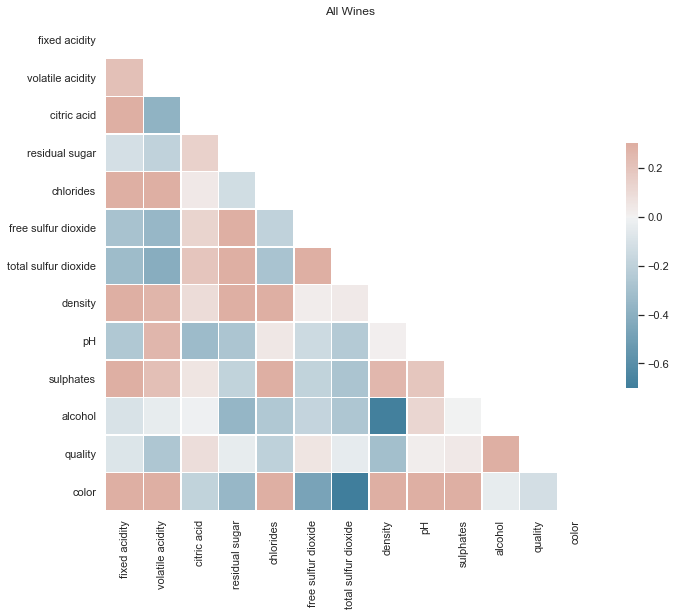

In [4]:
# Exploratory heatmap showing feature relationships for all wines combined
sns.set_theme(style="white")
corr = allwines.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('All Wines')
plt.show()

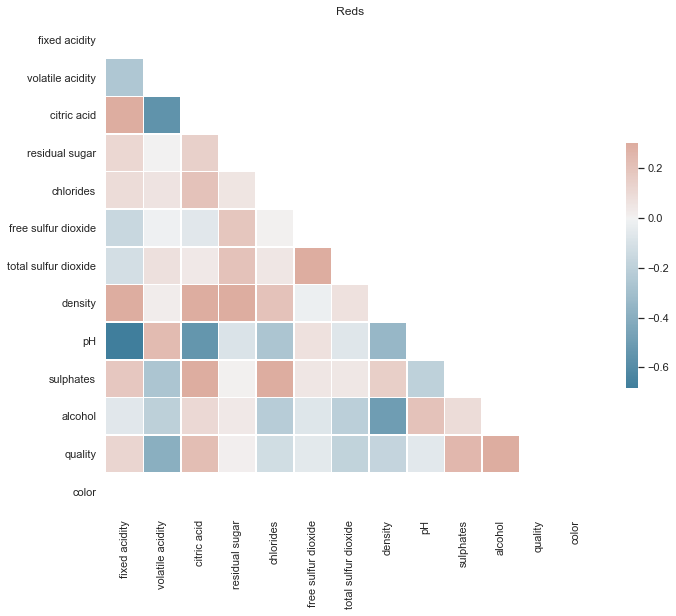

In [5]:
# Exploratory heatmap showing feature relationships for red wines
sns.set_theme(style="white")
corr = red.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Reds')
plt.show()

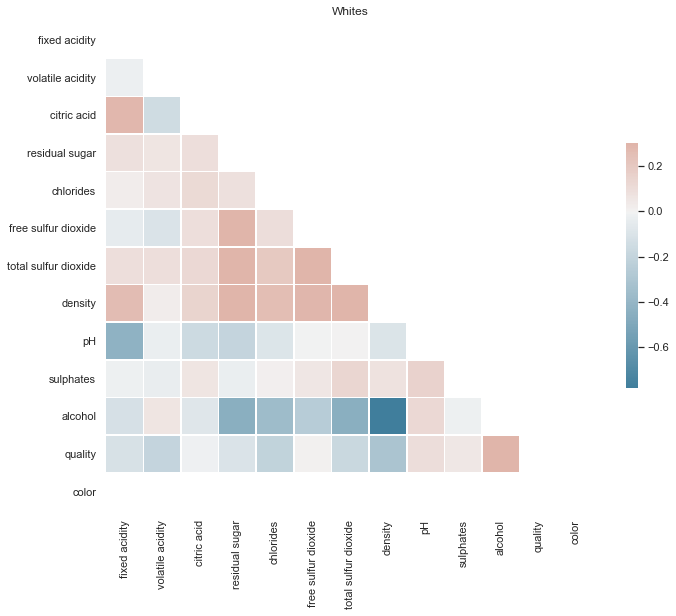

In [6]:
# Exploratory heatmap showing feature relationships for white wines
sns.set_theme(style="white")
corr = white.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Whites')
plt.show()

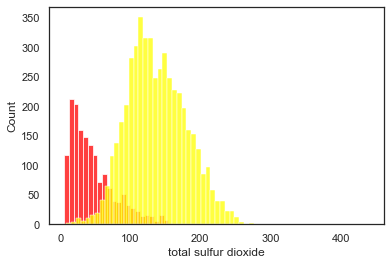

In [7]:
# Total sulfur dioxide red vs white histogram
sns.histplot(red["total sulfur dioxide"], color='red')
sns.histplot(white["total sulfur dioxide"], color='yellow')

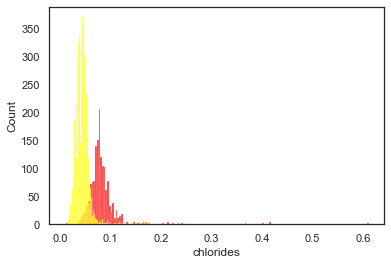

In [8]:
# Chlorides red vs white histogram
sns.histplot(red["chlorides"], color='red')
sns.histplot(white["chlorides"], color='yellow')

In [9]:
# Define target variable
target = allwines["color"]
# Remove target variable from test data
data = allwines.drop("color", axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Split data into train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
(data, target, random_state=42)

In [11]:
# Decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9833846153846154

In [12]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9956923076923077

In [13]:
# Ranked and scores feature importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.3055083580814705, 'total sulfur dioxide'),
 (0.2694431618662747, 'chlorides'),
 (0.11764910259348077, 'volatile acidity'),
 (0.05751813531800045, 'free sulfur dioxide'),
 (0.053277866676170425, 'density'),
 (0.05323417597301043, 'sulphates'),
 (0.051059521282127186, 'fixed acidity'),
 (0.03883833522732422, 'residual sugar'),
 (0.02834891057286689, 'pH'),
 (0.01562983962563981, 'citric acid'),
 (0.0075881951510812905, 'alcohol'),
 (0.0019043976325533588, 'quality')]

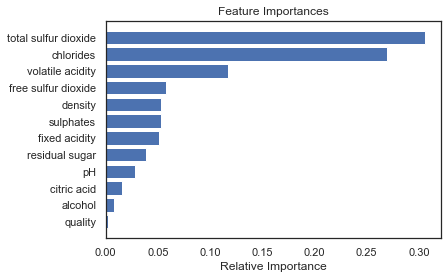

In [14]:
# Plot festure importance in horizontal bar chart
features=feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show(1)

In [15]:
# Print classification report
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1191
           1       1.00      0.99      0.99       434

    accuracy                           1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



In [16]:
# Cross validation attempt

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [18]:
def rfr_model(X_test, y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)
    
    grid_result = gsc.fit(X_test, y_test)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = f"Cross Validation Score: {cross_val_score(rfr, X_test, y_test, cv=10, scoring='neg_mean_absolute_error')}"
    predictions = f"Cross Validation Prediction: {cross_val_predict(rfr, X_test, y_test, cv=10)}"
    return scores, predictions

In [19]:
rfr_model(X_test, y_test)

('Cross Validation Score: [-0.03682409 -0.03838608 -0.03564952 -0.03721364 -0.03270878 -0.04022979\n -0.03638086 -0.02426487 -0.02286098 -0.02336837]',
 'Cross Validation Prediction: [0.00107589 0.75485948 0.00107589 ... 0.00114603 0.31524561 0.00114603]')

In [20]:
# Try classifier with just one feature (chlorides)

In [21]:
# Define target variable
target = allwines["color"]
# Remove target variable from test data
data = allwines["chlorides"].to_frame()
feature_names = data.columns
data.head()

,chlorides
0,0.076
1,0.098
2,0.092
3,0.075
4,0.076


In [22]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split\
(data, target, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9033846153846153

In [24]:
# Print classification report
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1191
           1       0.83      0.80      0.82       434

    accuracy                           0.90      1625
   macro avg       0.88      0.87      0.88      1625
weighted avg       0.90      0.90      0.90      1625



In [33]:
# Cross validation
rfr_model(X_test, y_test)

('Cross Validation Score: [-0.08232577 -0.09185735 -0.08066594 -0.07214982 -0.07207972 -0.09386105\n -0.05818488 -0.0455942  -0.07885547 -0.06931273]',
 'Cross Validation Prediction: [0.0407864  0.88315982 0.01691025 ... 0.01347213 0.41262848 0.0062198 ]')

In [34]:
# Try classifier on less relatively important features (remove chlorides and total sulfur dioxide)

In [28]:
# Define new target variable
target = allwines["color"]
# Remove target variable and other variables from test data
data = allwines.drop("color", axis=1)
data = data.drop("chlorides", axis=1)
data = data.drop("total sulfur dioxide", axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,11.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split\
(data, target, random_state=42)

In [30]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9846153846153847

In [31]:
# Print classification report
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1191
           1       0.97      0.97      0.97       434

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [32]:
# Ranked and scores feature importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.2754881538858621, 'volatile acidity'),
 (0.15178783323569814, 'density'),
 (0.12223440729826719, 'fixed acidity'),
 (0.10858757487350716, 'free sulfur dioxide'),
 (0.10749264936883814, 'sulphates'),
 (0.10592687610216797, 'residual sugar'),
 (0.05103308429272253, 'citric acid'),
 (0.04594980779026207, 'pH'),
 (0.0237833262542644, 'alcohol'),
 (0.0077162868984102856, 'quality')]

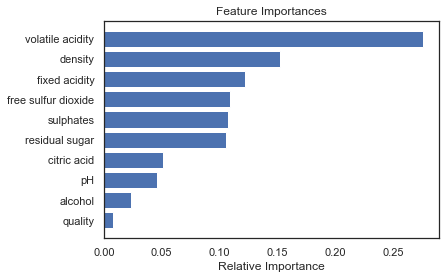

In [35]:
# Plot festure importance in horizontal bar chart
features=feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show(1)